In [14]:
### Monte Carlo simulations for Stock Price

### Monte Carlo simulation

Monte Carlo simulation (also known as the Monte Carlo Method) lets you see all the possible outcomes of maintenance planning decisions and assess the impact of risk, thus allowing for better decision making under uncertainty.

Stock price index is indicator for stock price movement. The index is one of the references for investor to invest in capital markets, especially stock.

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

<AxesSubplot: xlabel='Date'>

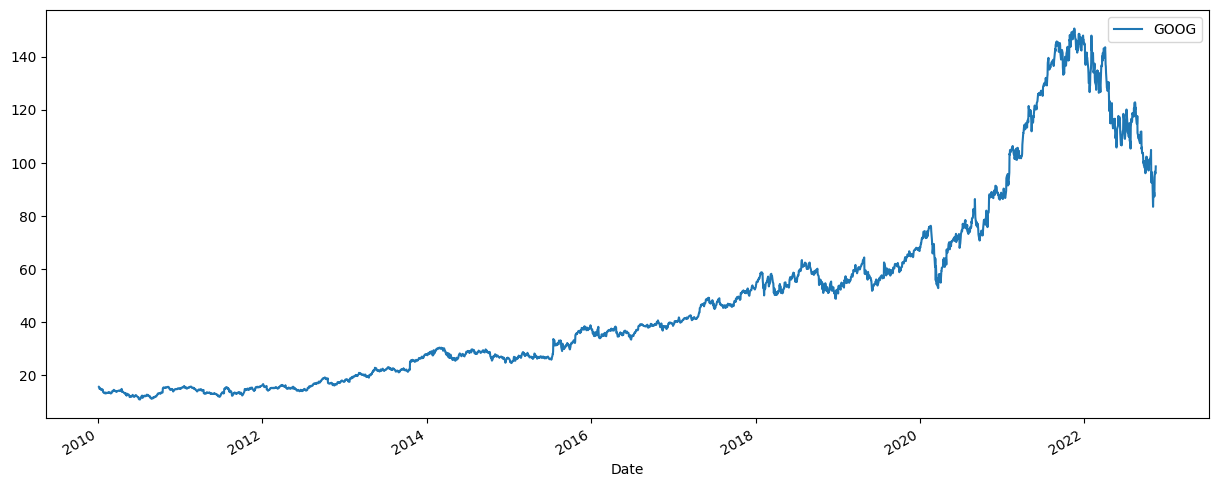

In [2]:
### Importing stock data


def import_stock_data(tickers, start='2010-1-1'):
    data = pd.DataFrame()
    if len([tickers]) ==1:
        data[tickers] = wb.DataReader(tickers, data_source='yahoo', start = start)['Adj Close']
        data = pd.DataFrame(data)
    else:
        for t in tickers:
            data[t] = wb.DataReader(t, data_source='yahoo', start = start)['Adj Close']
    return(data)


data = import_stock_data(["GOOG"]) #, start = '2005-1-1')
# data = import_stock_data(["FB","GOOG","AAPL"]) #, start = '2005-1-1')
#Plot
data.plot(figsize=(15,6))

In [3]:
data.head()

,GOOG
Date,
2010-01-04,15.610239
2010-01-05,15.541497
2010-01-06,15.149715
2010-01-07,14.797037
2010-01-08,14.994298


In [4]:
data.pct_change()

,GOOG
Date,
2010-01-04,NaN
2010-01-05,-0.004404
2010-01-06,-0.025209
2010-01-07,-0.023280
2010-01-08,0.013331
...,...
2022-11-09,-0.016983
2022-11-10,0.077460
2022-11-11,0.027185


Text(0, 0.5, 'Frequency')

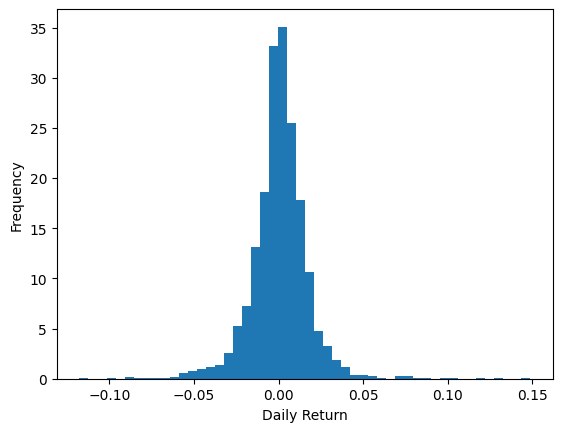

In [6]:
#### Compute Logarithmic Daily Returns

def log_returns(data):
    return (np.log(1+data.pct_change()))


log_return = log_returns(data)

#Plot
plt.hist(log_return.iloc[1:], bins=50, density=True)
plt.xlabel("Daily Return")
plt.ylabel("Frequency")

In [18]:
### Calculate Drift

def drift_calc(data):
    lr = log_returns(data)
    u = lr.mean()
    var = lr.var()
    drift = u-(0.5*var)
    try:
        return drift.values
    except:
        return drift
    
    
drift_calc(data)

array([0.00038959])

In [19]:
### Compute Daily Returns


def daily_returns(data, days, iterations):
    ft = drift_calc(data)
    try:
        stv = log_returns(data).std().values
    except:
        stv = log_returns(data).std()
    dr = np.exp(ft + stv * norm.ppf(np.random.rand(days, iterations)))
    
    return dr

daily = daily_returns(data['GOOG'], 50, 1000)

In [20]:
price_paths = np.zeros_like(daily)
price_paths[0] = data['GOOG'].iloc[-1]
for t in range(1, 50):
    price_paths[t] = price_paths[t-1]*daily[t]

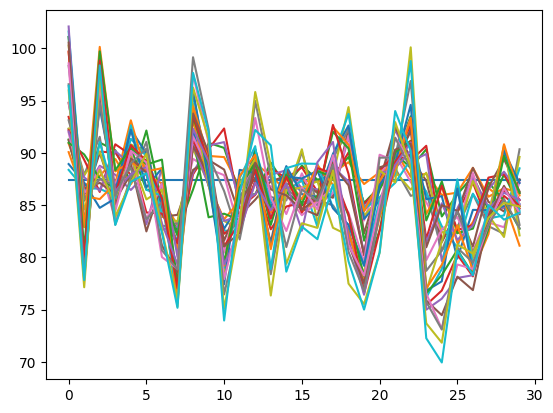

In [21]:
for i in range(30):
    plt.plot(price_paths[i][:30])

In [ ]:
b = np.pi / 2
a = 0

p1 = 1 / (b - a) * np.ones(x.shape[0])
p2 = 4 *(1 - 2 * x / np.pi) / np.pi

In [ ]:
plt.figure(figsize=(9, 5))
plt.plot(x, gx, label='cos(x)')
plt.plot(x, p1, label='Uniform distribution')
plt.plot(x, p2, label='Linear distribution')
plt.legend()
plt.show()

In [ ]:
def linear_distr(y):
    return np.pi * (1 - np.sqrt(1-y)) / 2

def uniform_distr(y):
    return np.random.uniform(0, np.pi / 2)

In [ ]:
values = []
for i in np.linspace(0, 1, 10000):
    rand = np.random.uniform(0, np.pi/2)
    values.append(linear_distr(rand))
    
plt.hist(values, bins=100)
plt.show()

In [ ]:
def MC_integral_1(gx, p, N):
    """with g(x) / p(x)"""

    u = np.random.uniform(0, np.pi/2, N)
#     gx = gx(u)
    px = p(u)
    diff = gx(px) / p(px) # or gx(px) / px
    diff = np.nan_to_num(diff)
#     print(diff)
    return diff.sum() / N
    
def MC_integral(gx, p, N):
    """with only uniform
        (b-a) * sum(g(x)) / N
        where x - are random varibles drawed from uniform distribution on (a, b)
    """

    u = np.random.uniform(0, np.pi/2, N)
    gx = gx(u)
    return gx / N    

In [ ]:
(MC_integral(integrand, uniform_distr, 10000) * (np.pi / 2)).sum()

In [ ]:
MC_integral_1(integrand, linear_distr, 100000)